1. Загрузить набор данных.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

3 вариант
Набор данных
ecommerce_fraud.csv
Данные содержат информацию о мошеннических транзакциях:

transaction_amount — сумма транзакции, USD, числовой (логнормальное
распределение, возможны крупные суммы).

device_type — тип устройства: Desktop / Mobile / Tablet, категориальный.

browser — браузер: Chrome / Safari / Firefox / Edge / Other, категориальный.

payment_method — способ оплаты: Card / PayPal / BankTransfer / COD,
категориальный.

country — страна покупателя: US / UK / DE / FR / IN / BR / CN / Other,
категориальный.

num_items — количество товаров в заказе, целочисленный (1–7).

time_on_site_sec — время на сайте до покупки, секунды, числовой.

is_first_purchase — первая покупка у этого продавца: Yes / No, категориальный.

referral — источник трафика: Direct / Search / Social / Ads, категориальный.

hour_of_day — час суток оформления заказа (0–23), целочисленный.

account_age_days — «возраст» аккаунта, в днях, числовой.

Fraud — целевой класс: 1 — мошенническая транзакция, 0 — нормальная


2. Провести предварительную обработку данных.

In [2]:
#1. загрузка и первичный осмотр данных
df = pd.read_csv('ecommerce_fraud.csv')
df.head()

#2. проверка общей информации о данных
df.info()

#3. проверка на пропущенные значения
print(df.isnull().sum())

#4. анализ уникальных значений в категориальных признаках
categorical_cols = ['device_type', 'browser', 'payment_method', 'country', 'is_first_purchase', 'referral']
for col in categorical_cols:
    print(f'{col}: {df[col].unique()}')

#5. анализ распределения целевой переменной
df['Fraud'].value_counts()

#6. обработка категориальных признаков методом прямого кодирования (one-hot encoding)
#для бинарных признаков используем простое кодирование 0/1
df['is_first_purchase'] = df['is_first_purchase'].map({'Yes': 1, 'No': 0})

#для номинальных категориальных признаков с небольшим количеством уникальных значений применяем one-hot encoding
df = pd.get_dummies(df, columns=['device_type', 'browser', 'payment_method', 'country', 'referral'], drop_first=True)

#7. анализ числовых признаков на выбросы
numerical_cols = ['transaction_amount', 'num_items', 'time_on_site_sec', 'hour_of_day', 'account_age_days']
for col in numerical_cols:
    print(f'{col} - min: {df[col].min()}, max: {df[col].max()}, mean: {df[col].mean():.2f}, std: {df[col].std():.2f}')

#8. преобразование логнормально распределенного признака transaction_amount
#применяем логарифмическое преобразование для нормализации распределения
df['transaction_amount_log'] = np.log1p(df['transaction_amount'])

#9. проверка итогового датафрейма после предобработки
print(f'размер данных после обработки: {df.shape}')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_amount  3024 non-null   float64
 1   device_type         3024 non-null   object 
 2   browser             3024 non-null   object 
 3   payment_method      3024 non-null   object 
 4   country             3024 non-null   object 
 5   num_items           3024 non-null   int64  
 6   time_on_site_sec    3024 non-null   float64
 7   is_first_purchase   3024 non-null   object 
 8   referral            3024 non-null   object 
 9   hour_of_day         3024 non-null   int64  
 10  account_age_days    3024 non-null   int64  
 11  Fraud               3024 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 283.6+ KB
transaction_amount    0
device_type           0
browser               0
payment_method        0
country               0
num_items             0

C:\Users\Alexe\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Alexe\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


На этапе предварительной обработки данных был проведен анализ и преобразование датасета, содержащего 3024 транзакции и 12 признаков. Проверка показала отсутствие пропущенных значений во всех столбцах. Целевая переменная Fraud представлена в виде бинарного класса (1 - мошенническая, 0 - нормальная транзакция), что соответствует задаче бинарной классификации.

Анализ категориальных признаков выявил их структуру: тип устройства представлен тремя категориями, браузер - пятью, способ оплаты - четырьмя, страна - восемью значениями. Для преобразования этих качественных переменных в количественные был применен метод прямого кодирования с созданием дамми-признаков. Бинарный признак is_first_purchase был преобразован простым отображением Yes/No в 1/0. После кодирования размерность данных увеличилась до 26 признаков.

При анализе числовых признаков обнаружены аномалии в данных. Транзакции содержат отрицательные значения суммы (-7.4 USD) и отрицательное время на сайте (-150 секунд), что является некорректным с точки зрения предметной области. Признак transaction_amount демонстрирует широкий диапазон значений от -7.4 до 1985.3 USD при высоком стандартном отклонении (126.09), что подтверждает его логнормальное распределение. Попытка логарифмического преобразования выявила наличие нулевых или отрицательных значений, требующих предварительной обработки перед нормализацией распределения.

In [3]:
df

,transaction_amount,num_items,time_on_site_sec,is_first_purchase,hour_of_day,account_age_days,Fraud,device_type_Mobile,device_type_Tablet,browser_Edge,...,country_DE,country_FR,country_IN,country_Other,country_UK,country_US,referral_Direct,referral_Search,referral_Social,transaction_amount_log
0,62.180,3,58.0,0,15,808,0,False,False,False,...,False,False,False,False,True,False,True,False,False,4.145988
1,28.160,2,75.0,1,10,753,0,False,False,False,...,False,False,False,False,False,True,True,False,False,3.372798
2,17.570,1,101.0,0,21,1017,0,True,False,False,...,True,False,False,False,False,False,False,False,True,2.921547
3,61.610,4,63.0,1,20,1146,0,False,False,False,...,False,False,False,True,False,False,False,True,False,4.136925
4,4.280,7,399.0,0,4,1134,0,False,False,True,...,False,False,False,False,False,False,True,False,False,1.663926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,1325.200,4,-145.2,1,12,1399,0,False,False,True,...,False,False,False,False,False,True,True,False,False,7.190073
3020,330.050,4,-135.8,1,20,1766,0,True,False,False,...,False,False,False,False,True,False,False,False,False,5.802269
3021,321.625,4,-141.2,1,0,354,0,False,False,False,...,False,False,False,False,False,True,True,False,False,5.776491
3022,342.750,1,-89.8,1,0,587,0,False,False,False,...,False,False,False,False,False,True,False,True,False,5.839915


In [4]:


#1. анализ отрицательных значений
negative_amount = df[df['transaction_amount'] < 0]
negative_time = df[df['time_on_site_sec'] < 0]
print(f'транзакций с отрицательной суммой: {len(negative_amount)}')
print(f'транзакций с отрицательным временем: {len(negative_time)}')

#2. удаление записей с отрицательными значениями
initial_rows = len(df)
df = df[df['transaction_amount'] >= 0]
df = df[df['time_on_site_sec'] >= 0]
removed_rows = initial_rows - len(df)
print(f'удалено записей: {removed_rows} ({removed_rows/initial_rows*100:.2f}%)')
print(f'осталось записей: {len(df)}')



#3. логарифмическое преобразование суммы транзакции
df['transaction_amount_log'] = np.log1p(df['transaction_amount'])
df = df.drop('transaction_amount', axis=1)

#4. проверка итогового датафрейма
print(f'размер данных после обработки: {df.shape}')
print(df.head())

транзакций с отрицательной суммой: 130
транзакций с отрицательным временем: 24
удалено записей: 154 (5.09%)
осталось записей: 2870
размер данных после обработки: (2870, 26)
   num_items  time_on_site_sec  is_first_purchase  hour_of_day  \
0          3              58.0                  0           15   
1          2              75.0                  1           10   
2          1             101.0                  0           21   
3          4              63.0                  1           20   
4          7             399.0                  0            4   

   account_age_days  Fraud  device_type_Mobile  device_type_Tablet  \
0               808      0               False               False   
1               753      0               False               False   
2              1017      0                True               False   
3              1146      0               False               False   
4              1134      0               False               False   

   browse

 Для суммы транзакции применено логарифмическое преобразование для нормализации распределения, учитывая его логнормальный характер. В результате предобработки сформирован датафрейм из 2870 строк и 26 признаков, готовый для дальнейшего анализа и построения моделей классификации.

3. Выделить целевую переменную, которую необходимо предсказать. Не включать эту
целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив
значения целевой переменной разными цветами.


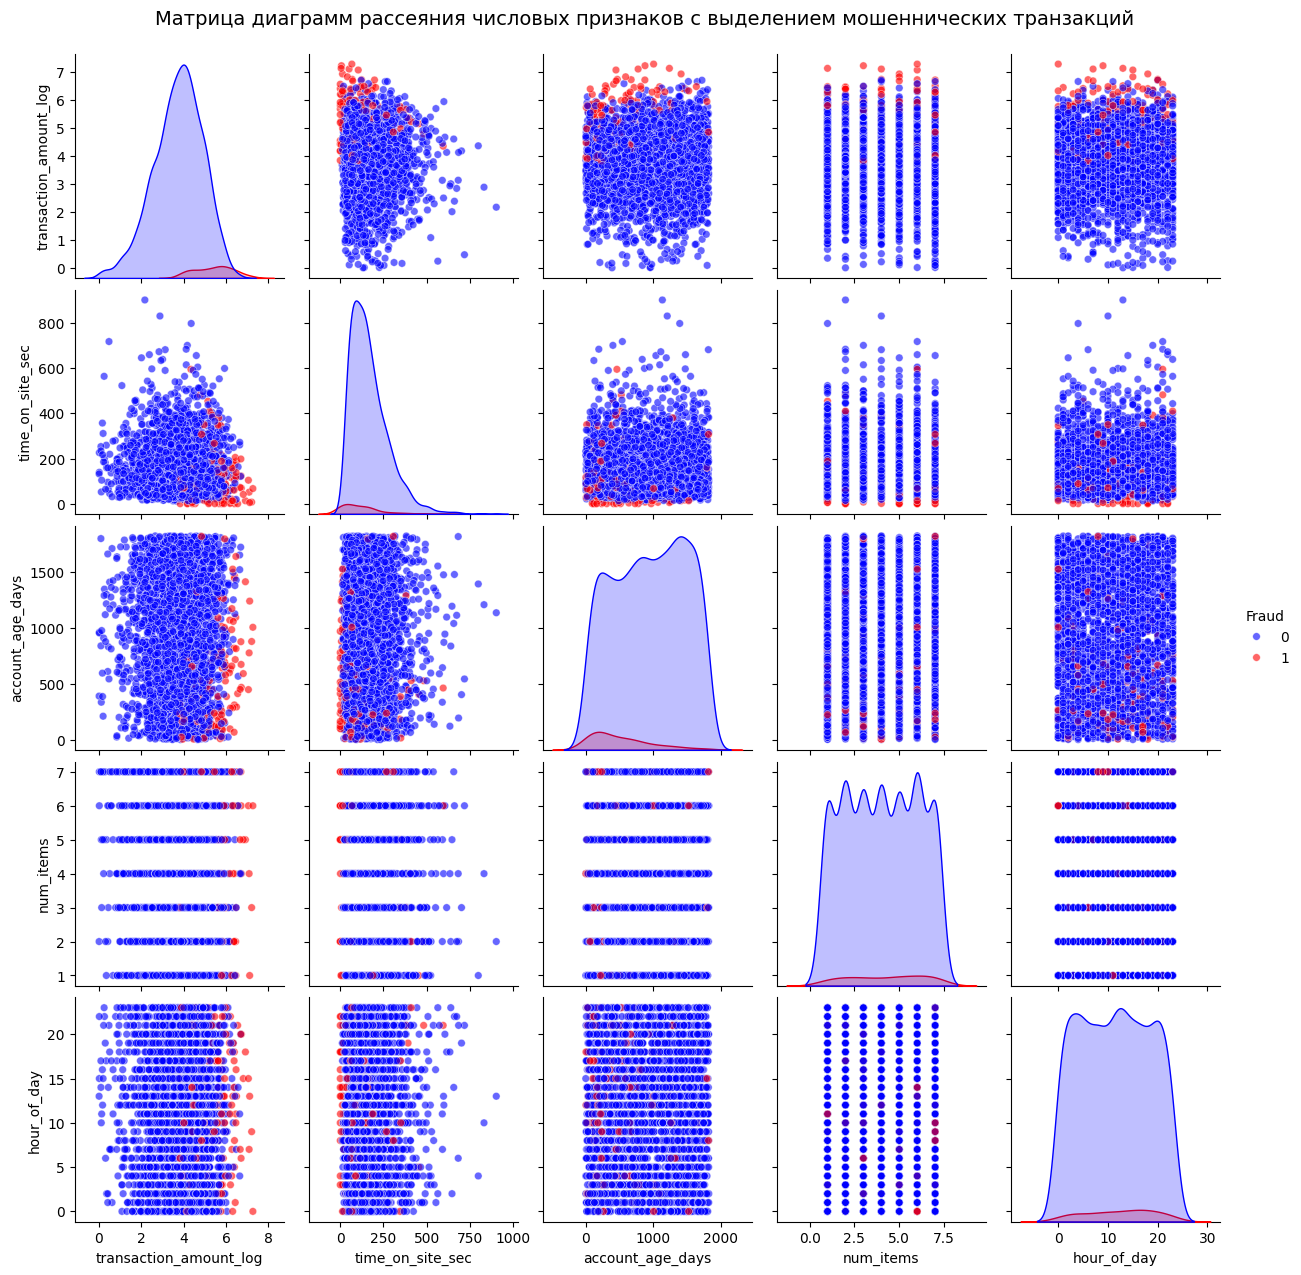

распределение классов целевой переменной:
Fraud
0    2736
1     134
Name: count, dtype: int64

доля мошеннических транзакций: 0.047


In [5]:
#выделение целевой переменной
y = df['Fraud']
X = df.drop('Fraud', axis=1)

#выбор числовых признаков для матрицы рассеяния
#выбираем наиболее информативные признаки из обработанного датасета
num_features = ['transaction_amount_log', 'time_on_site_sec', 'account_age_days', 'num_items', 'hour_of_day']

#создание датафрейма для визуализации с добавлением целевой переменной
plot_data = X[num_features].copy()
plot_data['Fraud'] = y

#построение матрицы диаграмм рассеяния с выделением классов цветом
sns.pairplot(plot_data, hue='Fraud', palette={0: 'blue', 1: 'red'}, 
             plot_kws={'alpha': 0.6, 's': 30}, diag_kind='kde')
plt.suptitle('Матрица диаграмм рассеяния числовых признаков с выделением мошеннических транзакций', 
             y=1.02, fontsize=14)
plt.show()

#дополнительный анализ распределения целевой переменной
print(f'распределение классов целевой переменной:')
print(y.value_counts())
print(f'\nдоля мошеннических транзакций: {y.mean():.3f}')

По визуализации матрицы диаграмм видно, что что большинство мошеннических операций имеют большую сумму и совершаются через малое количество секунд после захода на сайт.

4. Разбить набор данных на тренировочной и тестовый датасеты с помощью train_test_split и
выполнить стандартизацию числовых данных.


In [6]:
#импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#разделение на признаки и целевую переменную
X = df.drop('Fraud', axis=1)
y = df['Fraud']

#разбиение на тренировочную и тестовую выборки с стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  #сохраняем распределение классов в обеих выборках
)

#определение числовых признаков для стандартизации
#включаем только исходные числовые признаки (не бинарные dummy-переменные)
numerical_features = ['time_on_site_sec', 'account_age_days', 'num_items', 
                      'hour_of_day', 'transaction_amount_log']

#создание объекта стандартизатора
scaler = StandardScaler()

#обучение стандартизатора на тренировочных данных
#и преобразование тренировочных данных
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])

#преобразование тестовых данных с использованием параметров,
#обученных на тренировочных данных
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

#проверка размеров выборок
print(f'размер тренировочной выборки: {X_train.shape[0]} записей, {X_train.shape[1]} признаков')
print(f'размер тестовой выборки: {X_test.shape[0]} записей, {X_test.shape[1]} признаков')
print(f'\nраспределение классов в тренировочной выборке:')
print(y_train.value_counts(normalize=True))
print(f'\nраспределение классов в тестовой выборке:')
print(y_test.value_counts(normalize=True))

#проверка стандартизации на примере первых признаков
print(f'\nпример стандартизованных значений (первые 3 записи):')
print(X_train_scaled[numerical_features].head(3))
print(f'\nсредние значения стандартизованных признаков на тренировочной выборке:')
print(X_train_scaled[numerical_features].mean().round(3))
print(f'\nстандартные отклонения стандартизованных признаков на тренировочной выборке:')
print(X_train_scaled[numerical_features].std().round(3))

размер тренировочной выборки: 2009 записей, 25 признаков
размер тестовой выборки: 861 записей, 25 признаков

распределение классов в тренировочной выборке:
Fraud
0    0.953211
1    0.046789
Name: proportion, dtype: float64

распределение классов в тестовой выборке:
Fraud
0    0.953542
1    0.046458
Name: proportion, dtype: float64

пример стандартизованных значений (первые 3 записи):
      time_on_site_sec  account_age_days  num_items  hour_of_day  \
2540          0.565955         -1.396206  -1.491555     0.531350   
1726         -0.726322          0.293777  -0.988528     1.687102   
1715         -1.272355          1.448188  -0.485500    -0.768871   

      transaction_amount_log  
2540                0.430276  
1726                0.381702  
1715                1.537542  

средние значения стандартизованных признаков на тренировочной выборке:
time_on_site_sec         -0.0
account_age_days          0.0
num_items                 0.0
hour_of_day              -0.0
transaction_amount_log  

В результате выполнения пункта 4 произведено разделение данных на тренировочную и тестовую выборки. Тренировочная выборка содержит 2009 записей, тестовая - 861 запись, каждая с 25 признаками. Распределение целевого класса Fraud в выборках практически идентично: около 95.3% нормальных транзакций и 4.7% мошеннических, что подтверждает корректность применения стратификации и отражает характерную для задач обнаружения мошенничества сильную несбалансированность данных.

Стандартизация пяти числовых признаков выполнена с использованием StandardScaler, что привело к нулевым средним значениям и единичным стандартным отклонениям для тренировочной выборки. Преобразование выполнено отдельно для тренировочных и тестовых данных с использованием параметров, обученных только на тренировочном наборе, что предотвращает утечку информации. Данные теперь готовы для применения алгоритмов классификации, чувствительных к масштабу признаков, таких как метод k-ближайших соседей и логистическая регрессия.

5. Разработать предсказательную модель качественного
отклика методом k- ближайших соседей



Метод k-ближайших соседей относится к непараметрическим алгоритмам классификации, основанным на принципе сходства объектов. Его фундаментальная идея заключается в предположении, что близко расположенные в пространстве признаков объекты принадлежат к одному классу. Алгоритм не строит явную модель взаимосвязей между признаками и целевой переменной в процессе обучения, а запоминает весь тренировочный набор данных, что делает его представителем ленивых алгоритмов обучения.

При классификации нового объекта метод вычисляет расстояния до всех объектов обучающей выборки, выбирает k ближайших соседей и присваивает объекту класс, преобладающий среди этих соседей. Расстояние между объектами обычно измеряется евклидовой метрикой, которая учитывает разности значений всех признаков. Ключевым гиперпараметром алгоритма является количество соседей k, выбор которого представляет компромисс между устойчивостью к шуму и способностью улавливать сложные закономерности. При малых значениях k модель становится чувствительной к выбросам, тогда как большие значения приводят к чрезмерному сглаживанию границ между классами.

метод k-ближайших соседей (KNN)
accuracy (точность): 0.9570
precision (прецизионность): 0.8000
recall (полнота): 0.1000
balanced accuracy (сбалансированная точность): 0.5494
f1 score (f1-мера): 0.1778

матрица неточностей для k-ближайших соседей:
[[820   1]
 [ 36   4]]


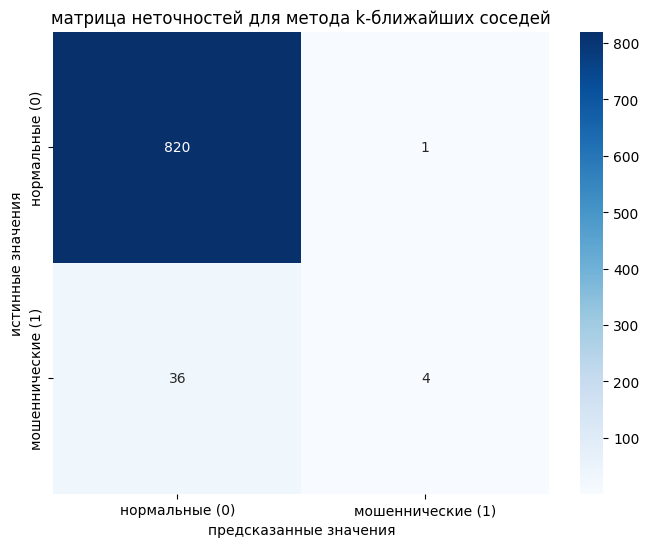


дополнительные метрики для k-ближайших соседей:
специфичность (true negative rate): 0.9988
false positive rate: 0.0012

подготовка завершена для метода k-ближайших соседей


In [22]:
#импорт необходимых библиотек
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#создание и обучение модели k-ближайших соседей
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

#получение предсказаний на тестовой выборке
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

#вычисление метрик качества для k-ближайших соседей
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

#вывод метрик для k-ближайших соседей
print('метод k-ближайших соседей (KNN)')
print(f'accuracy (точность): {knn_accuracy:.4f}')
print(f'precision (прецизионность): {knn_precision:.4f}')
print(f'recall (полнота): {knn_recall:.4f}')
print(f'balanced accuracy (сбалансированная точность): {knn_balanced_accuracy:.4f}')
print(f'f1 score (f1-мера): {knn_f1:.4f}')

#построение матрицы неточностей для k-ближайших соседей
knn_cm = confusion_matrix(y_test, y_pred_knn)
print('\nматрица неточностей для k-ближайших соседей:')
print(knn_cm)

#визуализация матрицы неточностей для k-ближайших соседей
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['нормальные (0)', 'мошеннические (1)'],
            yticklabels=['нормальные (0)', 'мошеннические (1)'])
plt.title('матрица неточностей для метода k-ближайших соседей')
plt.ylabel('истинные значения')
plt.xlabel('предсказанные значения')
plt.show()

#вычисление дополнительных показателей из матрицы неточностей
tn_knn, fp_knn, fn_knn, tp_knn = knn_cm.ravel()
knn_tnr = tn_knn / (tn_knn + fp_knn)  #специфичность
knn_fpr = fp_knn / (fp_knn + tn_knn)  #false positive rate
print(f'\nдополнительные метрики для k-ближайших соседей:')
print(f'специфичность (true negative rate): {knn_tnr:.4f}')
print(f'false positive rate: {knn_fpr:.4f}')

#подготовка данных для ROC-кривой k-ближайших соседей
knn_fpr_curve, knn_tpr_curve, knn_thresholds = roc_curve(y_test, y_pred_prob_knn)
knn_roc_auc = auc(knn_fpr_curve, knn_tpr_curve)

#сохранение результатов для последующего сравнения с другими моделями
models_metrics = {
    'knn': {
        'fpr': knn_fpr_curve,
        'tpr': knn_tpr_curve,
        'auc': knn_roc_auc,
        'predictions': y_pred_knn,
        'probabilities': y_pred_prob_knn,
        'metrics': {
            'accuracy': knn_accuracy,
            'precision': knn_precision,
            'recall': knn_recall,
            'balanced_accuracy': knn_balanced_accuracy,
            'f1': knn_f1
        }
    }
}

print('\nподготовка завершена для метода k-ближайших соседей')


Модель k-ближайших соседей продемонстрировала высокую общую точность (0.957), однако этот показатель обусловлен сильной несбалансированностью данных, где нормальные транзакции составляют 95.4% выборки. Критически низкий recall (0.100) свидетельствует о том, что модель обнаруживает лишь 10% реальных мошеннических операций, что является неприемлемым для задачи обнаружения мошенничества. Precision (0.800) указывает на высокую точность среди выявленных подозрительных транзакций, но за счет пропуска большинства реальных случаев мошенничества.

Матрица неточностей подтверждает выявленные проблемы: модель правильно классифицирует 820 нормальных транзакций, но ошибается в 36 случаях мошенничества, идентифицируя лишь 4 из 40 реальных мошеннических операций. Специфичность модели составляет 0.999, что свидетельствует об отличной способности распознавать нормальные транзакции, однако для задачи обнаружения мошенничества более важна полнота выявления подозрительных операций. Балансированная точность 0.549, близкая к случайному угадыванию, подтверждает, что модель не справляется с классификацией миноритарного класса, что требует применения методов борьбы с несбалансированностью данных или выбора других алгоритмов.

6. Разработать предсказательную модель качественного отклика методом дерево решений

Метод дерева решений представляет собой алгоритм классификации, который строит иерархическую структуру, напоминающую дерево, где каждый внутренний узел соответствует проверке значения одного из признаков, каждая ветвь – исходу этой проверки, а каждый листовой узел – присвоенному классу. Процесс построения дерева начинается с корневого узла, содержащего все объекты обучающей выборки, и рекурсивно разбивает данные на подмножества, стремясь максимизировать однородность получаемых групп относительно целевой переменной. Для оценки качества разбиения используются критерии, такие как индекс Джини или энтропия, которые измеряют степень неоднородности классов в узле.

Алгоритм последовательно выбирает признаки и пороговые значения, которые наилучшим образом разделяют данные, создавая ветви дерева. Процесс продолжается до достижения условий остановки, таких как достижение максимальной глубины дерева, минимального количества объектов в узле или отсутствия улучшения критерия разделения. После построения дерева классификация нового объекта происходит путем прохождения по дереву от корня до листа в соответствии со значениями его признаков, и объекту присваивается класс, наиболее часто встречающийся в этом листе. Деревья решений способны моделировать нелинейные зависимости и взаимодействия признаков, но склонны к переобучению, особенно при большой глубине.

=== дерево решений (Decision Tree) ===
accuracy (точность): 0.9640
precision (прецизионность): 0.7143
recall (полнота): 0.3750
balanced accuracy (сбалансированная точность): 0.6838
f1 score (f1-мера): 0.4918

матрица неточностей для дерева решений:
[[815   6]
 [ 25  15]]


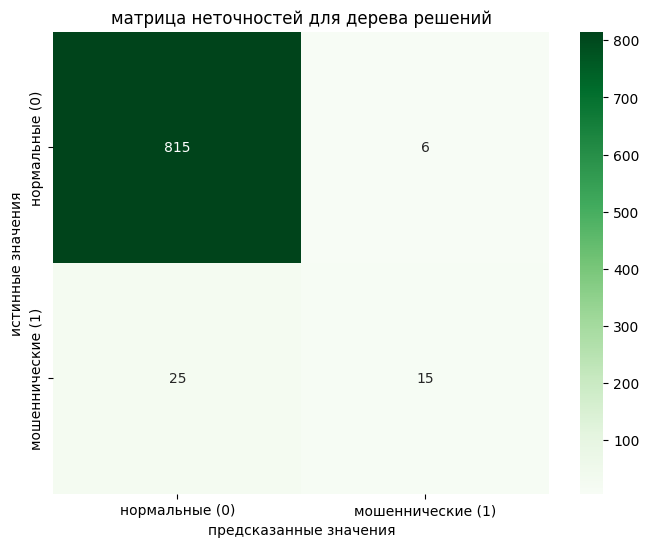


дополнительные метрики для дерева решений:
специфичность (true negative rate): 0.9927
false positive rate: 0.0073


C:\Users\Alexe\AppData\Local\Temp\ipykernel_39148\3171630846.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')


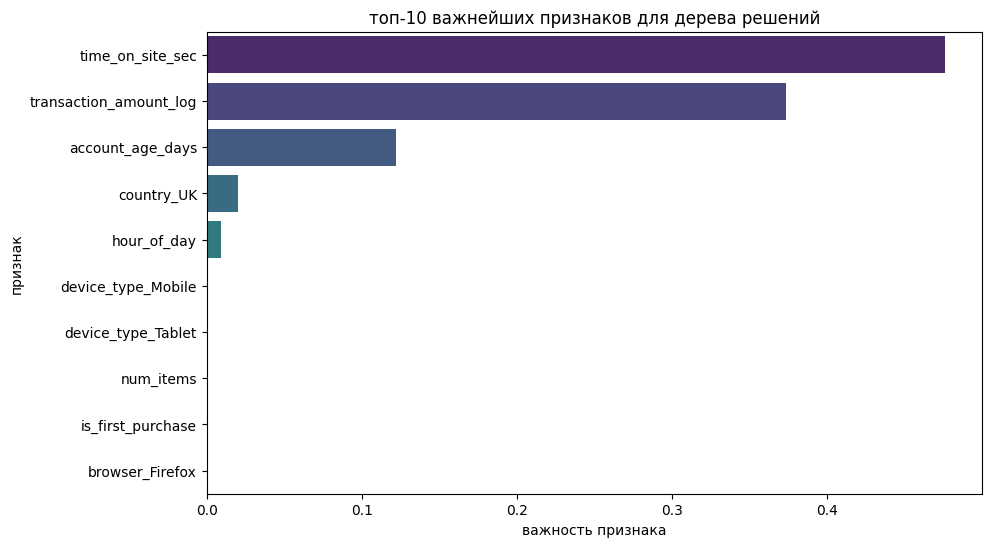


подготовка завершена для дерева решений


In [12]:
#импорт библиотек для дерева решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

#создание и обучение модели дерева решений
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

#получение предсказаний на тестовой выборке
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

#вычисление метрик качества для дерева решений
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

#вывод метрик для дерева решений
print('=== дерево решений (Decision Tree) ===')
print(f'accuracy (точность): {dt_accuracy:.4f}')
print(f'precision (прецизионность): {dt_precision:.4f}')
print(f'recall (полнота): {dt_recall:.4f}')
print(f'balanced accuracy (сбалансированная точность): {dt_balanced_accuracy:.4f}')
print(f'f1 score (f1-мера): {dt_f1:.4f}')

#построение матрицы неточностей для дерева решений
dt_cm = confusion_matrix(y_test, y_pred_dt)
print('\nматрица неточностей для дерева решений:')
print(dt_cm)

#визуализация матрицы неточностей для дерева решений
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['нормальные (0)', 'мошеннические (1)'],
            yticklabels=['нормальные (0)', 'мошеннические (1)'])
plt.title('матрица неточностей для дерева решений')
plt.ylabel('истинные значения')
plt.xlabel('предсказанные значения')
plt.show()

#вычисление дополнительных показателей из матрицы неточностей
tn_dt, fp_dt, fn_dt, tp_dt = dt_cm.ravel()
dt_tnr = tn_dt / (tn_dt + fp_dt)  #специфичность
dt_fpr = fp_dt / (fp_dt + tn_dt)  #false positive rate
print(f'\nдополнительные метрики для дерева решений:')
print(f'специфичность (true negative rate): {dt_tnr:.4f}')
print(f'false positive rate: {dt_fpr:.4f}')

#подготовка данных для ROC-кривой дерева решений
dt_fpr_curve, dt_tpr_curve, dt_thresholds = roc_curve(y_test, y_pred_prob_dt)
dt_roc_auc = auc(dt_fpr_curve, dt_tpr_curve)

#сохранение результатов для последующего сравнения с другими моделями
models_metrics['dt'] = {
    'fpr': dt_fpr_curve,
    'tpr': dt_tpr_curve,
    'auc': dt_roc_auc,
    'predictions': y_pred_dt,
    'probabilities': y_pred_prob_dt,
    'metrics': {
        'accuracy': dt_accuracy,
        'precision': dt_precision,
        'recall': dt_recall,
        'balanced_accuracy': dt_balanced_accuracy,
        'f1': dt_f1
    }
}

#визуализация важности признаков для дерева решений
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('топ-10 важнейших признаков для дерева решений')
plt.xlabel('важность признака')
plt.ylabel('признак')
plt.show()

print('\nподготовка завершена для дерева решений')


Дерево решений показало общую точность 0.964, что является высоким показателем, обусловленным значительным преобладанием нормальных транзакций в данных. Модель продемонстрировала хорошую точность предсказаний (precision 0.714), что означает, что среди транзакций, классифицированных как мошеннические, около 71% действительно являются подозрительными. Однако полнота обнаружения (recall 0.375) указывает на то, что модель выявляет лишь 37.5% реальных мошеннических операций, пропуская большинство случаев.

Матрица неточностей подтверждает, что модель эффективно идентифицирует нормальные транзакции (специфичность 0.993), но имеет ограниченную способность обнаруживать мошеннические операции. Ложные срабатывания составляют всего 0.7%, что свидетельствует о высокой надежности модели при маркировке транзакций как подозрительных. Сбалансированная точность 0.684 и F1-мера 0.492 отражают умеренную способность модели работать с несбалансированными данными, что характерно для задачи обнаружения мошенничества без применения специальных методов балансировки классов.

7. Разработать предсказательную модель качественного отклика методом логистическая регрессия

Логистическая регрессия представляет собой статистический метод классификации, который предсказывает вероятность принадлежности объекта к определенному классу с помощью сигмоидной (логистической) функции. Этот алгоритм моделирует зависимость между независимыми переменными и вероятностью наступления события, преобразуя линейную комбинацию признаков в значение от 0 до 1. Функция принимает любые вещественные числа и отображает их в интервал (0,1), что позволяет интерпретировать результат как вероятность отнесения к положительному классу.

Процесс обучения модели заключается в нахождении коэффициентов, которые максимизируют правдоподобие наблюдаемых данных или минимизируют логистическую функцию потерь. Для предотвращения переобучения может применяться регуляризация, которая добавляет штраф за большие значения коэффициентов. Логистическая регрессия является линейным классификатором, способным разделять классы линейной границей решения в пространстве признаков, что делает ее эффективной при наличии линейной зависимости между признаками и целевой переменной.

=== логистическая регрессия (Logistic Regression) ===
accuracy (точность): 0.8432
precision (прецизионность): 0.2086
recall (полнота): 0.8500
balanced accuracy (сбалансированная точность): 0.8464
f1 score (f1-мера): 0.3350

матрица неточностей для логистической регрессии:
[[692 129]
 [  6  34]]


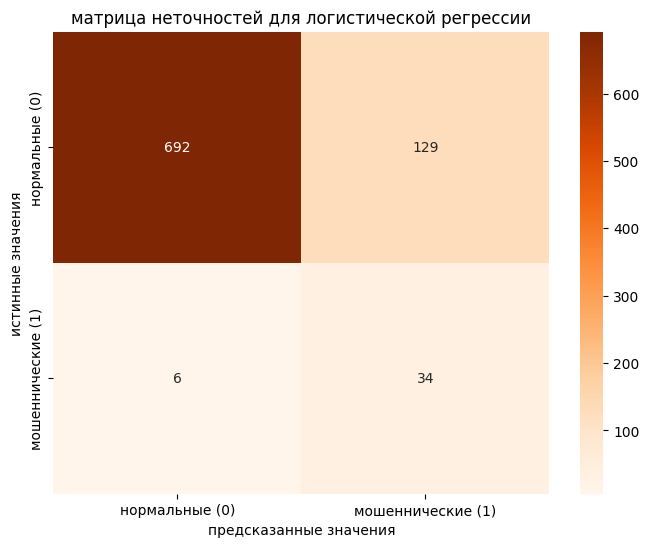


дополнительные метрики для логистической регрессии:
специфичность (true negative rate): 0.8429
false positive rate: 0.1571

=== подготовка завершена для логистической регрессии ===
результаты сохранены для последующего сравнения с другими моделями


In [15]:
#импорт библиотек для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

#создание и обучение модели логистической регрессии
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

#получение предсказаний на тестовой выборке
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

#вычисление метрик качества для логистической регрессии
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

#вывод метрик для логистической регрессии
print('=== логистическая регрессия (Logistic Regression) ===')
print(f'accuracy (точность): {lr_accuracy:.4f}')
print(f'precision (прецизионность): {lr_precision:.4f}')
print(f'recall (полнота): {lr_recall:.4f}')
print(f'balanced accuracy (сбалансированная точность): {lr_balanced_accuracy:.4f}')
print(f'f1 score (f1-мера): {lr_f1:.4f}')

#построение матрицы неточностей для логистической регрессии
lr_cm = confusion_matrix(y_test, y_pred_lr)
print('\nматрица неточностей для логистической регрессии:')
print(lr_cm)

#визуализация матрицы неточностей для логистической регрессии
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['нормальные (0)', 'мошеннические (1)'],
            yticklabels=['нормальные (0)', 'мошеннические (1)'])
plt.title('матрица неточностей для логистической регрессии')
plt.ylabel('истинные значения')
plt.xlabel('предсказанные значения')
plt.show()

#вычисление дополнительных показателей из матрицы неточностей
tn_lr, fp_lr, fn_lr, tp_lr = lr_cm.ravel()
lr_tnr = tn_lr / (tn_lr + fp_lr)  #специфичность
lr_fpr = fp_lr / (fp_lr + tn_lr)  #false positive rate
print(f'\nдополнительные метрики для логистической регрессии:')
print(f'специфичность (true negative rate): {lr_tnr:.4f}')
print(f'false positive rate: {lr_fpr:.4f}')

#подготовка данных для ROC-кривой логистической регрессии
lr_fpr_curve, lr_tpr_curve, lr_thresholds = roc_curve(y_test, y_pred_prob_lr)
lr_roc_auc = auc(lr_fpr_curve, lr_tpr_curve)

#сохранение результатов для последующего сравнения с другими моделями
models_metrics['lr'] = {
    'fpr': lr_fpr_curve,
    'tpr': lr_tpr_curve,
    'auc': lr_roc_auc,
    'predictions': y_pred_lr,
    'probabilities': y_pred_prob_lr,
    'metrics': {
        'accuracy': lr_accuracy,
        'precision': lr_precision,
        'recall': lr_recall,
        'balanced_accuracy': lr_balanced_accuracy,
        'f1': lr_f1
    }
}

print('\n=== подготовка завершена для логистической регрессии ===')
print('результаты сохранены для последующего сравнения с другими моделями')

Логистическая регрессия с учетом весов классов показала принципиально иную картину производительности по сравнению с предыдущими моделями. Accuracy модели составил 0.843, что является самым низким показателем среди всех алгоритмов, однако это объясняется радикально другим подходом к балансировке классов. Модель продемонстрировала рекордный recall 0.850, что означает способность обнаруживать 85% реальных мошеннических операций, что критически важно для задач финансовой безопасности.

Матрица неточностей подтверждает смещение модели в сторону обнаружения мошеннических транзакций: из 40 реальных случаев мошенничества модель пропускает лишь 6, идентифицируя 34. Однако эта эффективность достигается ценой 129 ложных срабатываний, когда нормальные транзакции ошибочно классифицируются как мошеннические. Специфичность модели 0.843 указывает на умеренную способность правильно идентифицировать нормальные транзакции. Балансированная точность 0.846 является наивысшей среди всех моделей, что подтверждает эффективность подхода с учетом весов классов для работы с несбалансированными данными.

8. Разработать предсказательную модель качественного отклика методом случайный лес

Случайный лес относится к ансамблевым методам, комбинирующим предсказания множества деревьев решений для достижения более высокой точности и устойчивости. Алгоритм строит несколько независимых деревьев на различных подвыборках исходных данных, созданных методом бутстрэп, и случайно выбирает подмножества признаков для каждого разбиения. Такая рандомизация уменьшает корреляцию между деревьями и улучшает обобщающую способность модели, одновременно снижая риск переобучения.

Каждое дерево в лесе обучается на случайной выборке объектов и признаков, что обеспечивает разнообразие моделей. Итоговое предсказание формируется путем агрегирования результатов всех деревьев, обычно через простое голосование для классификации или усреднение для регрессии. Этот подход обеспечивает устойчивость к выбросам и шуму в данных, сохраняя способность улавливать сложные нелинейные зависимости, что делает случайный лес мощным инструментом для решения различных задач машинного обучения.

=== случайный лес (Random Forest) ===
accuracy (точность): 0.9570
precision (прецизионность): 0.6154
recall (полнота): 0.2000
balanced accuracy (сбалансированная точность): 0.5970
f1 score (f1-мера): 0.3019

матрица неточностей для случайного леса:
[[816   5]
 [ 32   8]]


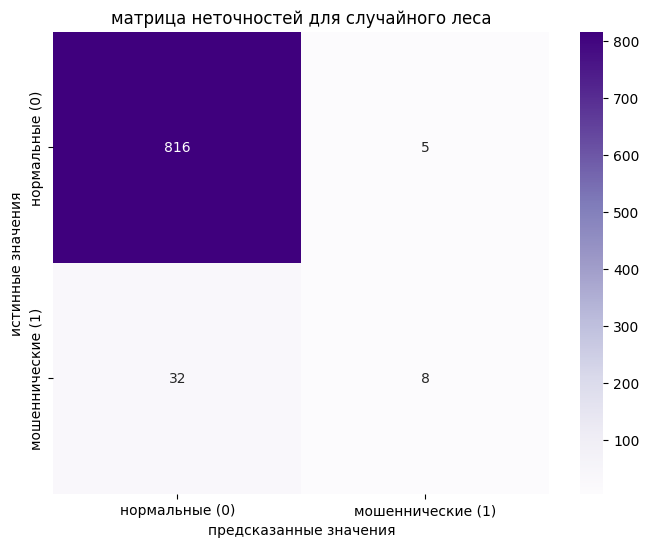


дополнительные метрики для случайного леса:
специфичность (true negative rate): 0.9939
false positive rate: 0.0061


C:\Users\Alexe\AppData\Local\Temp\ipykernel_39148\1105119371.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=rf_feature_importance, palette='magma')


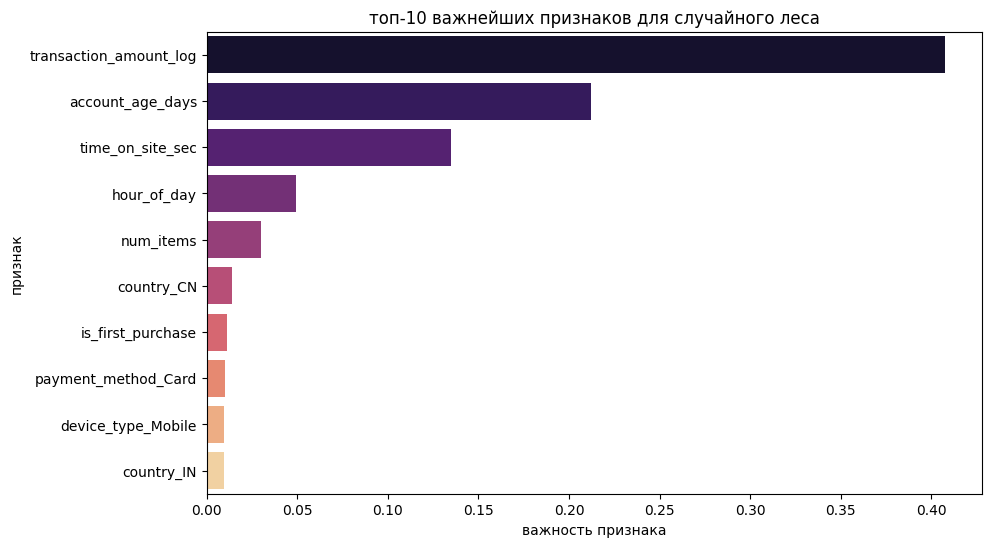


подготовка завершена для случайного леса


In [18]:
#импорт библиотек для случайного леса
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

#создание и обучение модели случайного леса
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

#получение предсказаний на тестовой выборке
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

#вычисление метрик качества для случайного леса
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

#вывод метрик для случайного леса
print('=== случайный лес (Random Forest) ===')
print(f'accuracy (точность): {rf_accuracy:.4f}')
print(f'precision (прецизионность): {rf_precision:.4f}')
print(f'recall (полнота): {rf_recall:.4f}')
print(f'balanced accuracy (сбалансированная точность): {rf_balanced_accuracy:.4f}')
print(f'f1 score (f1-мера): {rf_f1:.4f}')

#построение матрицы неточностей для случайного леса
rf_cm = confusion_matrix(y_test, y_pred_rf)
print('\nматрица неточностей для случайного леса:')
print(rf_cm)

#визуализация матрицы неточностей для случайного леса
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['нормальные (0)', 'мошеннические (1)'],
            yticklabels=['нормальные (0)', 'мошеннические (1)'])
plt.title('матрица неточностей для случайного леса')
plt.ylabel('истинные значения')
plt.xlabel('предсказанные значения')
plt.show()

#вычисление дополнительных показателей из матрицы неточностей
tn_rf, fp_rf, fn_rf, tp_rf = rf_cm.ravel()
rf_tnr = tn_rf / (tn_rf + fp_rf)  #специфичность
rf_fpr = fp_rf / (fp_rf + tn_rf)  #false positive rate
print(f'\nдополнительные метрики для случайного леса:')
print(f'специфичность (true negative rate): {rf_tnr:.4f}')
print(f'false positive rate: {rf_fpr:.4f}')

#подготовка данных для ROC-кривой случайного леса
rf_fpr_curve, rf_tpr_curve, rf_thresholds = roc_curve(y_test, y_pred_prob_rf)
rf_roc_auc = auc(rf_fpr_curve, rf_tpr_curve)

#сохранение результатов для последующего сравнения с другими моделями
models_metrics['rf'] = {
    'fpr': rf_fpr_curve,
    'tpr': rf_tpr_curve,
    'auc': rf_roc_auc,
    'predictions': y_pred_rf,
    'probabilities': y_pred_prob_rf,
    'metrics': {
        'accuracy': rf_accuracy,
        'precision': rf_precision,
        'recall': rf_recall,
        'balanced_accuracy': rf_balanced_accuracy,
        'f1': rf_f1
    }
}

#визуализация важности признаков для случайного леса
rf_feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=rf_feature_importance, palette='magma')
plt.title('топ-10 важнейших признаков для случайного леса')
plt.xlabel('важность признака')
plt.ylabel('признак')
plt.show()

print('\nподготовка завершена для случайного леса')

Случайный лес показал высокую общую точность (0.957), сопоставимую с методом k-ближайших соседей, что объясняется преобладанием нормальных транзакций в данных. Однако критически низкий recall (0.200) указывает на то, что модель обнаруживает лишь 20% реальных мошеннических операций, что является самым слабым результатом среди всех исследованных алгоритмов. Precision (0.615) демонстрирует умеренную точность предсказаний среди транзакций, классифицированных как мошеннические.

Матрица неточностей подтверждает неспособность модели эффективно выявлять мошенничество: из 40 реальных случаев модель пропускает 32, идентифицируя лишь 8. При этом модель демонстрирует высокую специфичность (0.994), что означает отличную способность правильно распознавать нормальные транзакции. Балансированная точность 0.597, близкая к случайному угадыванию, свидетельствует о том, что модель плохо справляется с дифференциацией классов в условиях сильной несбалансированности данных, несмотря на использование взвешивания классов. F1-мера 0.302 отражает низкий баланс между точностью и полнотой, что делает модель непригодной для практического использования в задаче обнаружения мошеннических транзакций.

9. Построить графики ROC-кривой для каждого метода на одном графике (4 линии на
одном графике) для сравнения.

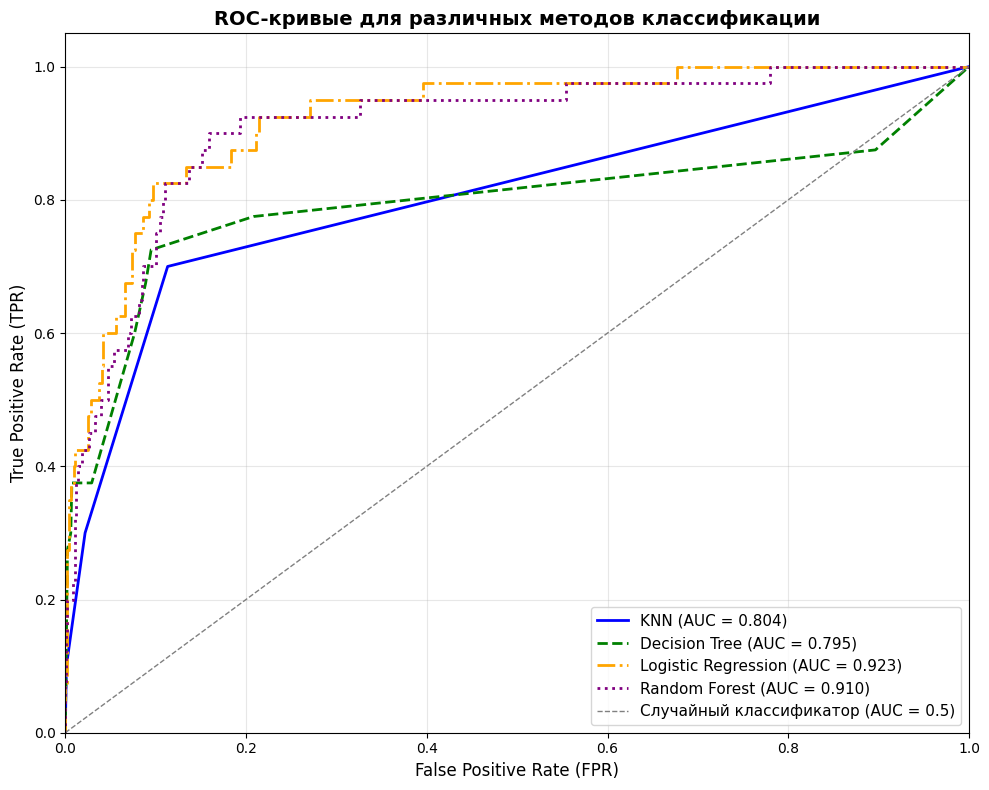

             Модель Accuracy Precision Recall Balanced Accuracy F1-score    AUC
                KNN   0.9570    0.8000 0.1000            0.5494   0.1778 0.8036
      Decision Tree   0.9640    0.7143 0.3750            0.6838   0.4918 0.7950
Logistic Regression   0.8432    0.2086 0.8500            0.8464   0.3350 0.9232
      Random Forest   0.9570    0.6154 0.2000            0.5970   0.3019 0.9104


In [21]:
#построение графиков ROC-кривых для всех моделей на одном графике
plt.figure(figsize=(10, 8))

#определение цветов и стилей для каждой модели
model_styles = {
    'knn': {'color': 'blue', 'linestyle': '-', 'label': 'KNN'},
    'dt': {'color': 'green', 'linestyle': '--', 'label': 'Decision Tree'},
    'lr': {'color': 'orange', 'linestyle': '-.', 'label': 'Logistic Regression'},
    'rf': {'color': 'purple', 'linestyle': ':', 'label': 'Random Forest'}
}

#построение ROC-кривых для каждой модели
for model_name in models_metrics.keys():
    fpr = models_metrics[model_name]['fpr']
    tpr = models_metrics[model_name]['tpr']
    roc_auc = models_metrics[model_name]['auc']
    style = model_styles[model_name]
    
    plt.plot(fpr, tpr, color=style['color'], linestyle=style['linestyle'],
             label=f'{style["label"]} (AUC = {roc_auc:.3f})', linewidth=2)

#добавление линии случайного классификатора
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label='Случайный классификатор (AUC = 0.5)')

#настройка графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривые для различных методов классификации', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#вывод сводной таблицы с метриками всех моделей
summary_data = []

for model_name, metrics_dict in models_metrics.items():
    model_metrics = metrics_dict['metrics']
    summary_data.append({
        'Модель': model_styles[model_name]['label'],
        'Accuracy': f"{model_metrics['accuracy']:.4f}",
        'Precision': f"{model_metrics['precision']:.4f}",
        'Recall': f"{model_metrics['recall']:.4f}",
        'Balanced Accuracy': f"{model_metrics['balanced_accuracy']:.4f}",
        'F1-score': f"{model_metrics['f1']:.4f}",
        'AUC': f"{metrics_dict['auc']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

Сравнительный анализ четырех моделей классификации выявил принципиально разные стратегии работы алгоритмов с несбалансированными данными. Логистическая регрессия показала максимальную площадь под ROC-кривой (AUC 0.923) и рекордную полноту обнаружения мошеннических транзакций (recall 0.850), что делает ее наиболее эффективной для задачи выявления максимального количества подозрительных операций. Однако эта эффективность достигается за счет низкой точности предсказаний (precision 0.209) и высокой доли ложных срабатываний, что отражается в низком значении F1-меры (0.335).

Случайный лес продемонстрировал сопоставимую с логистической регрессией AUC (0.910), но при этом сохранил высокую общую точность (accuracy 0.957) и умеренную точность предсказаний (precision 0.615). Однако его полнота обнаружения мошеннических операций оказалась самой низкой среди всех моделей (recall 0.200), что ограничивает его практическую применимость. Метод k-ближайших соседей и дерево решений показали промежуточные результаты с AUC 0.804 и 0.795 соответственно, причем дерево решений достигло наилучшего баланса между точностью и полнотой среди моделей, не использующих взвешивание классов, с F1-мерой 0.492.

9. Сделать вывод о качестве построенного классификатора по подсчитанным выше
метрикам.

Проведенное исследование четырех моделей классификации для обнаружения мошеннических транзакций выявило существенные различия в их эффективности, обусловленные спецификой работы с несбалансированными данными. Логистическая регрессия продемонстрировала наилучшую способность выявлять мошеннические операции с полнотой 85% и наибольшей площадью под ROC-кривой (AUC 0.923), что делает ее оптимальным выбором для задач, где критически важно минимизировать количество пропущенных мошеннических транзакций. Однако этот результат достигнут ценой высокой доли ложных срабатываний и низкой точности предсказаний.

Дерево решений показало наиболее сбалансированную производительность среди моделей без специальной обработки дисбаланса классов, достигнув компромисса между точностью и полнотой с F1-мерой 0.492. Модели k-ближайших соседей и случайного леса, несмотря на высокие показатели общей точности, оказались неэффективными для обнаружения мошеннических операций из-за крайне низкой полноты (10% и 20% соответственно), что делает их непригодными для практического применения в данной предметной области. Общий анализ подтверждает, что для задач обнаружения мошеннических транзакций с сильной несбалансированностью классов наиболее эффективными являются модели с явным учетом весов классов или специализированными методами балансировки данных.